In [2]:
import pandas as pd
import numpy as np

In [13]:
file_path = "../data/processed/cleaned_dataset.csv"
df = pd.read_csv(file_path)

In [14]:
df.sample(5)

,src_tokens,trg_tokens,src_ids,trg_ids,src_len,trg_len
16892,"['▁we', '▁will', '▁catch', '▁tom', '.']","['▁wir', '▁werden', '▁tom', '▁fangen', '.']","[2, 61, 102, 1421, 22, 4, 3]","[2, 66, 294, 28, 3032, 4, 3]",7,7
29984,"['▁we', '▁have', '▁suppl', 'iers', '.']","['▁wir', '▁haben', '▁zul', 'iefer', 'er', '.']","[2, 61, 65, 3900, 2674, 4, 3]","[2, 66, 148, 5962, 14105, 9, 4, 3]",7,8
10021,"['▁i', '▁am', '▁having', '▁fun', '.']","['▁ich', '▁amüs', 'iere', '▁mich', '.']","[2, 8, 104, 1133, 747, 4, 3]","[2, 27, 2863, 1071, 127, 4, 3]",7,7
200710,"['▁a', '▁hideous', '▁monster', '▁used', '▁to',...","['▁dort', '▁hau', 'ste', '▁einmal', '▁ein', '▁...","[2, 9, 10820, 6962, 587, 10, 370, 161, 4, 3]","[2, 548, 1951, 169, 486, 41, 13551, 2431, 1301...",10,11
60918,"['▁it', '▁is', '▁good', '▁to', '▁see', '▁you',...","['▁es', '▁ist', '▁schön', '▁dich', '▁zu', '▁se...","[2, 63, 32, 223, 10, 195, 21, 4, 3]","[2, 61, 49, 579, 189, 50, 465, 5, 3]",9,9


In [15]:
print("English Lengths:")
print(df['src_len'].describe())
print("\nGerman Lengths:")
print(df['trg_len'].describe())

English Lengths:
count    277891.000000
mean          9.680072
std           2.696914
min           4.000000
25%           8.000000
50%           9.000000
75%          11.000000
max         107.000000
Name: src_len, dtype: float64

German Lengths:
count    277891.000000
mean          9.684754
std           2.870442
min           4.000000
25%           8.000000
50%           9.000000
75%          11.000000
max         102.000000
Name: trg_len, dtype: float64


In [ ]:
# !pip install matplotlib seaborn

  Using cached matplotlib-3.10.3-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 734.5 kB/s eta 0:00:00


You should consider upgrading via the 'D:\AI Projects\LangConv\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

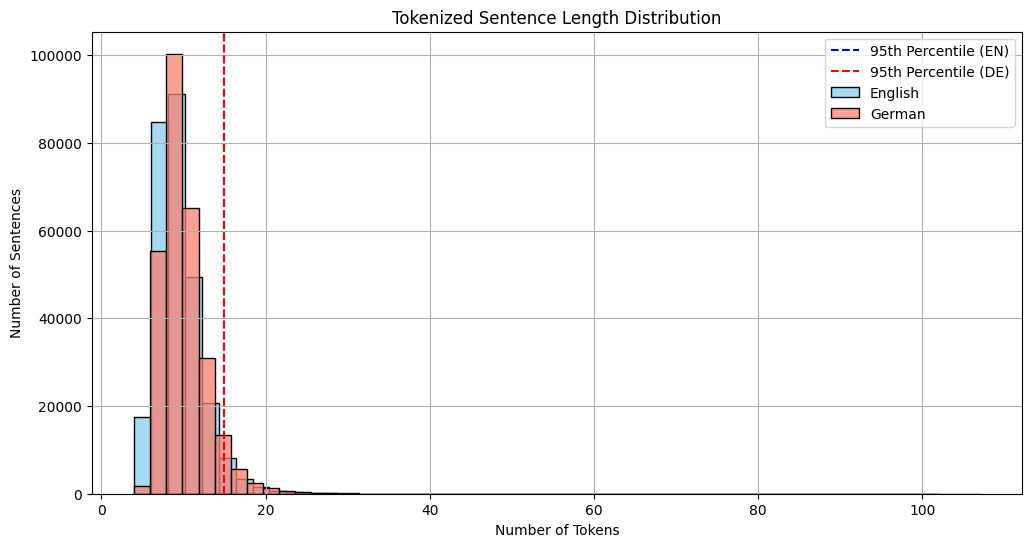

In [19]:


plt.figure(figsize=(12, 6))
sns.histplot(df['src_len'], bins=50, color='skyblue', label='English')
sns.histplot(df['trg_len'], bins=50, color='salmon', label='German')
plt.axvline(df['src_len'].quantile(0.95), color='blue', linestyle='--', label='95th Percentile (EN)')
plt.axvline(df['trg_len'].quantile(0.95), color='red', linestyle='--', label='95th Percentile (DE)')
plt.title('Tokenized Sentence Length Distribution')
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Sentences')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
en_95 = df['src_len'].quantile(0.95)
de_95 = df['trg_len'].quantile(0.95)



print(f"95th percentile (English): {en_95}")
print(f"95th percentile (German): {de_95}")


95th percentile (English): 15.0
95th percentile (German): 15.0


In [22]:
# !pip install wordcloud

In [26]:
print(df['src_ids'].head())
print(type(df['src_ids'].iloc[0]))


0      [2, 76, 4, 3]
1    [2, 3226, 4, 3]
2    [2, 3226, 4, 3]
3     [2, 786, 5, 3]
4     [2, 786, 4, 3]
Name: src_ids, dtype: object
<class 'str'>


In [27]:
import ast

df['src_ids'] = df['src_ids'].apply(ast.literal_eval)
df['trg_ids'] = df['trg_ids'].apply(ast.literal_eval)

In [28]:
print(df['src_ids'].head())
print(type(df['src_ids'].iloc[0]))

0      [2, 76, 4, 3]
1    [2, 3226, 4, 3]
2    [2, 3226, 4, 3]
3     [2, 786, 5, 3]
4     [2, 786, 4, 3]
Name: src_ids, dtype: object
<class 'list'>


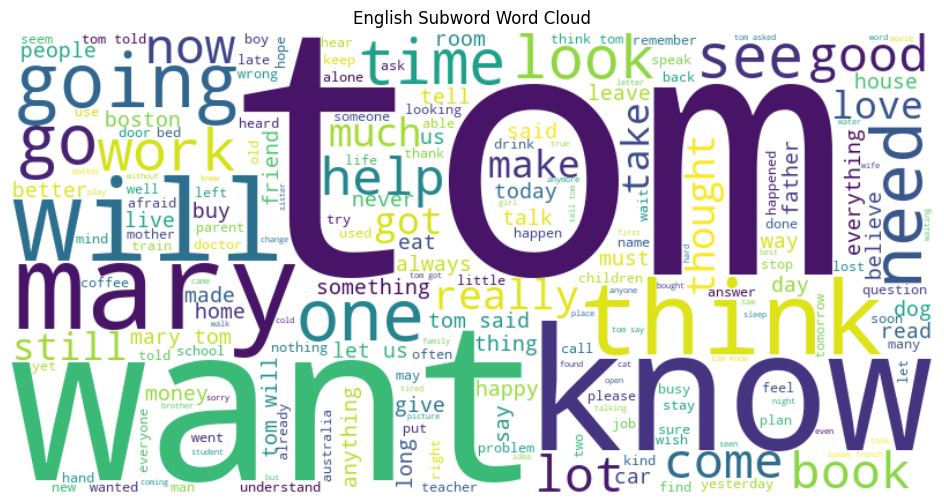

In [29]:
from wordcloud import WordCloud
import sentencepiece as spm
import matplotlib.pyplot as plt  # Required to show the plot

# Load the SentencePiece model for English
sp_en = spm.SentencePieceProcessor()
sp_en.load("../data/processed/spm_en.model")

# Decode token ids back to subwords for English
all_english_subwords = [
    subword for sent in df['src_ids']
    for subword in sp_en.decode_ids(sent).split()
]

# Create text blob
english_text_blob = ' '.join(all_english_subwords)

# Generate word cloud
wordcloud_en = WordCloud(width=800, height=400, background_color='white').generate(english_text_blob)

# Display
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_en, interpolation='bilinear')
plt.axis('off')
plt.title('English Subword Word Cloud')
plt.show()


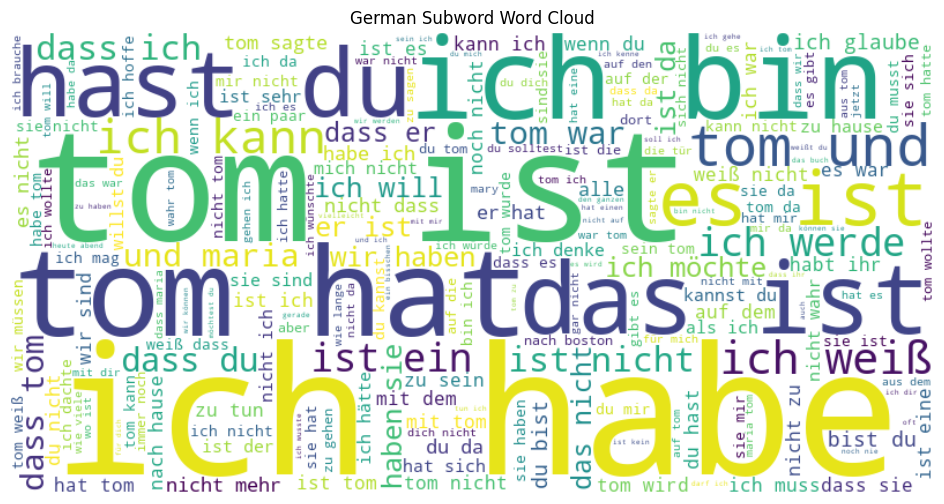

In [30]:
sp_de = spm.SentencePieceProcessor()
sp_de.load("../data/processed/spm_de.model")

all_german_subwords = [
    subword for sent in df['trg_ids']
    for subword in sp_de.decode_ids(sent).split()
]

german_text_blob = ' '.join(all_german_subwords)

wordcloud_de = WordCloud(width=800, height=400, background_color='white').generate(german_text_blob)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_de, interpolation='bilinear')
plt.axis('off')
plt.title('German Subword Word Cloud')
plt.show()
